In [3]:
import sympy as sym
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

#ÍTEM 1

Punto 1

In [4]:
Loss_dt, g, W, G, C_rr, AC_d, rho, V_gs, V_hw = sym.symbols("Loss_dt, g, W, G, C_rr, AC_d, rho, V_gs, V_hw")

In [5]:
P_legs = (1-Loss_dt/100)**(-1)*( g*W*sym.sin(sym.atan(G/100))+g*W*sym.cos(sym.atan(G/100))*C_rr + 0.5*AC_d*rho*(V_gs+V_hw)**2)*V_gs
P_legs

V_gs*(0.5*AC_d*rho*(V_gs + V_hw)**2 + C_rr*W*g/sqrt(G**2/10000 + 1) + G*W*g/(100*sqrt(G**2/10000 + 1)))/(1 - Loss_dt/100)

In [6]:
poly_form_almost = P_legs.expand(V_gs)
poly_form_almost

0.5*AC_d*V_gs**3*rho/(1 - Loss_dt/100) + 1.0*AC_d*V_gs**2*V_hw*rho/(1 - Loss_dt/100) + 0.5*AC_d*V_gs*V_hw**2*rho/(1 - Loss_dt/100) + C_rr*V_gs*W*g/(-Loss_dt*sqrt(G**2/10000 + 1)/100 + sqrt(G**2/10000 + 1)) + G*V_gs*W*g/(-Loss_dt*sqrt(G**2/10000 + 1) + 100*sqrt(G**2/10000 + 1))

In [7]:
poly_form = 0.5*AC_d*V_gs**3*rho/(1 - Loss_dt/100) + 1.0*AC_d*V_gs**2*V_hw*rho/(1 - Loss_dt/100) + (0.5*AC_d*V_hw**2*rho/(1 - Loss_dt/100) + C_rr*W*g/(-Loss_dt*sym.sqrt(G**2/10000 + 1)/100 + sym.sqrt(G**2/10000 + 1)) + G*W*g/(-Loss_dt*sym.sqrt(G**2/10000 + 1) + 100*sym.sqrt(G**2/10000 + 1)))*V_gs
poly_form

0.5*AC_d*V_gs**3*rho/(1 - Loss_dt/100) + 1.0*AC_d*V_gs**2*V_hw*rho/(1 - Loss_dt/100) + V_gs*(0.5*AC_d*V_hw**2*rho/(1 - Loss_dt/100) + C_rr*W*g/(-Loss_dt*sqrt(G**2/10000 + 1)/100 + sqrt(G**2/10000 + 1)) + G*W*g/(-Loss_dt*sqrt(G**2/10000 + 1) + 100*sqrt(G**2/10000 + 1)))

Punto 2

In [64]:
Pleggs = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],[rho,1.225],[W,83.5],[g,9.77]])
Pleggs

0.21875*V_gs**3 + V_gs*(8.3244387755102*G/sqrt(G**2/10000 + 1) + 4.1622193877551/sqrt(G**2/10000 + 1))

In [56]:
puertos = pd.read_excel("data\puertos.xlsx")
primera_grafica = puertos.loc[puertos["Primera gráfica\nÚltimo dígito 1er estudiante"]==1].reset_index()
segunda_grafica = puertos.loc[puertos["Segunda gráfica\nÚltimo dígito 2do estudiante"]==9].reset_index()

In [68]:
x,t =sym.symbols("x,t")

pendiente_1 = primera_grafica["Pendiente promedio [%]"][0]
distancia_1 = primera_grafica["Distancia [km]"][0]
tiempo_1 = primera_grafica["Mejor tiempo registrado en Strava [min]"][0]*60

pendiente_2 = segunda_grafica["Pendiente promedio [%]"][0]
distancia_2 = segunda_grafica["Distancia [km]"][0]
tiempo_2 = segunda_grafica["Mejor tiempo registrado en Strava [min]"][0]*60


Pleggs1 = Pleggs.subs([[G,pendiente_1],[V_gs,x/t]])
Pleggs1 = Pleggs1.subs(x,distancia_1)

Pleggs2 = Pleggs.subs([[G,pendiente_2],[V_gs,x/t]])
Pleggs2 = Pleggs2.subs(x,distancia_2)


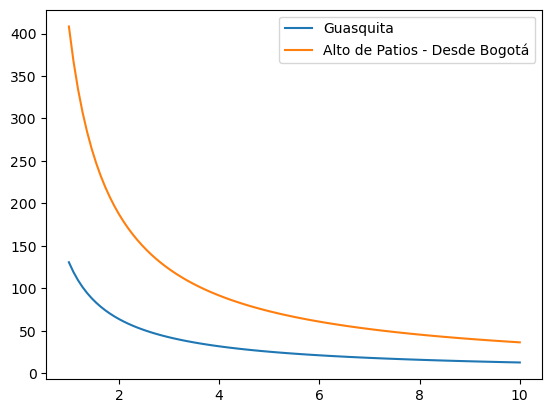

In [126]:
tiempos = np.linspace(1,10,100)

P_leggs1 = sym.lambdify(t,Pleggs1)
P_leggs2 = sym.lambdify(t,Pleggs2)

plt.plot(tiempos,P_leggs1(tiempos),label="{0}".format(primera_grafica["Nombre del puerto"][0]))
plt.plot(tiempos,P_leggs2(tiempos),label="{0}".format(segunda_grafica["Nombre del puerto"][0]))
plt.legend()

Punto 3

In [106]:
tiempo_237W_primera_grafica = sym.solve(sym.Eq(Pleggs1,237),t)[0]
tiempo_237W_segunda_grafica = sym.solve(sym.Eq(Pleggs2,237),t)[0]

In [107]:
tiempo_237W_primera_grafica, tiempo_237W_segunda_grafica

(0.585144736507678, 1.60631975226055)

Punto 4

In [108]:
Pleggs_new1_primera_grafica = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],
                                              [rho,1.225],[W,82.5],[g,9.77],[V_gs,x/t],[G,pendiente_1]])
Pleggs_new1_primera_grafica = Pleggs_new1_primera_grafica.subs(x,distancia_1)


Pleggs_new2_primera_grafica = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],
                                              [rho,1.225],[W,78.5],[g,9.77],[V_gs,x/t],[G,pendiente_1]])
Pleggs_new2_primera_grafica = Pleggs_new2_primera_grafica.subs(x,distancia_1)

In [114]:
tiempo1_237W_primera_grafica = sym.solve(sym.Eq(Pleggs_new1_primera_grafica,237),t)[0]
tiempo2_237W_primera_grafica = sym.solve(sym.Eq(Pleggs_new2_primera_grafica,237),t)[0]

tiempo_ganado1_primera_grafica = tiempo_237W_primera_grafica - tiempo1_237W_primera_grafica
tiempo_ganado2_primera_grafica = tiempo_237W_primera_grafica - tiempo2_237W_primera_grafica

tiempo_ganado1_primera_grafica, tiempo_ganado2_primera_grafica

(0.00542788426299223, 0.0269016607567861)

In [102]:
Pleggs_new1_segunda_grafica = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],
                                              [rho,1.225],[W,82.5],[g,9.77],[V_gs,x/t],[G,pendiente_2]])
Pleggs_new1_segunda_grafica = Pleggs_new1_segunda_grafica.subs(x,distancia_2)


Pleggs_new2_segunda_grafica = poly_form.subs([[C_rr,0.005],[V_hw,0],[AC_d,0.35],[Loss_dt,2],
                                              [rho,1.225],[W,78.5],[g,9.77],[V_gs,x/t],[G,pendiente_2]])
Pleggs_new2_segunda_grafica = Pleggs_new2_segunda_grafica.subs(x,distancia_2)

In [111]:
tiempo1_237W_segunda_grafica = sym.solve(sym.Eq(Pleggs_new1_segunda_grafica,237),t)[0]
tiempo2_237W_segunda_grafica = sym.solve(sym.Eq(Pleggs_new2_segunda_grafica,237),t)[0]

tiempo_ganado1_segunda_grafica = tiempo_237W_segunda_grafica - tiempo1_237W_segunda_grafica
tiempo_ganado2_segunda_grafica = tiempo_237W_segunda_grafica - tiempo2_237W_segunda_grafica

tiempo_ganado1_segunda_grafica, tiempo_ganado2_segunda_grafica

(0.0167852969719398, 0.0834507131552231)

Punto 5

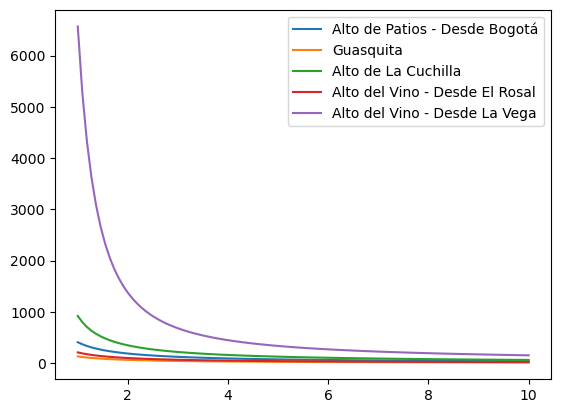

In [131]:
for i in range(5):
    conjunto = puertos.loc[puertos["Primera gráfica\nÚltimo dígito 1er estudiante"]==i].reset_index()

    pendiente = conjunto["Pendiente promedio [%]"][0]
    distancia = conjunto["Distancia [km]"][0]
    tiempo = conjunto["Mejor tiempo registrado en Strava [min]"][0]*60

    Pleggs_ = Pleggs.subs([[G,pendiente],[V_gs,x/t]])
    Pleggs_ = Pleggs_.subs(x,distancia)

    func_save = sym.lambdify(t,Pleggs_)

    plt.plot(tiempos,func_save(tiempos),label="{0}".format(conjunto["Nombre del puerto"][0]))

plt.legend()
    

#ÍTEM 2

In [16]:
DataFrame2 = pd.read_excel("data/data.xlsx")

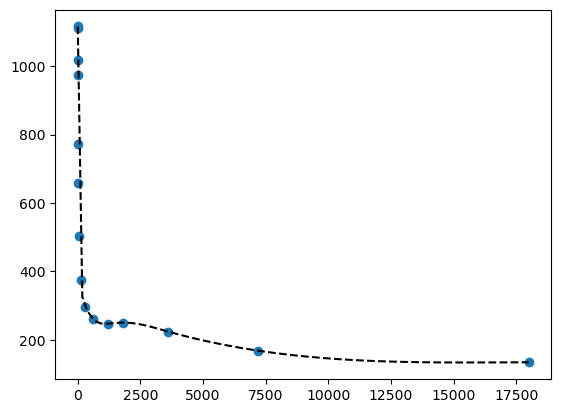

In [18]:
DataFrame3 = pd.read_csv("data/curva-potencia.csv",sep=";")
p_media = np.array(DataFrame3["Power [W]"])
time = np.array(DataFrame3["Time [s]"])
plt.scatter(time,p_media)
itp_spline = scipy.interpolate.splrep(time, p_media, k=3)

x_new = np.linspace(time[0],time[-1],100)
y_new = scipy.interpolate.splev(x_new, tck=itp_spline)

plt.plot(x_new,y_new,color="black",linestyle="--")